In [1]:
#Importamos las librerías necesarias.
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

sns.set()

In [2]:
#Tomamos el contenido del csv hallado en webscrapping.ipynb
sp500_empresas = pd.read_csv('Empresas_SP500_con_marketcap.csv')
sp500_empresas.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Market Capitalization
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,6.023020e+10
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,9.909733e+09
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1.793130e+11
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),2.710367e+11
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,1.705861e+11


In [3]:
#Seleccinamos un sector cualquiera
sector = 'Information Technology'
sp500_sector_empresas = sp500_empresas[sp500_empresas['GICS Sector']==sector]
sp500_sector_empresas.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Market Capitalization
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,1.705861e+11
7,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982,1.595158e+11
8,ADP,ADP,Information Technology,Data Processing & Outsourced Services,"Roseland, New Jersey",1981-03-31,8670,1949,9.238392e+10
14,AKAM,Akamai,Information Technology,Internet Services & Infrastructure,"Cambridge, Massachusetts",2007-07-12,1086222,1998,1.183416e+10
27,AMD,AMD,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488,1969,1.287308e+11


Vamos a realizar el mismo gráfico pero para los distintos sectores. Como se mencionó en webscrapping.ipynb no se tendrá en cuenta el sector de energía.

In [4]:
#Importamos los datos del sector
sp500_sector = pd.read_csv('C:/Users/larra/Documents/PI02/Sectores/'+sector+'.csv',index_col=0)
sp500_sector.index = pd.to_datetime(sp500_sector.index)
sp500_sector.head()

,Close,Volume
Date,,
2000-02-23,834.309631,0
2000-02-24,849.518982,0
2000-02-25,836.369507,0
2000-02-28,832.399780,0
2000-02-29,845.899109,0


<Axes: xlabel='Date', ylabel='Close'>

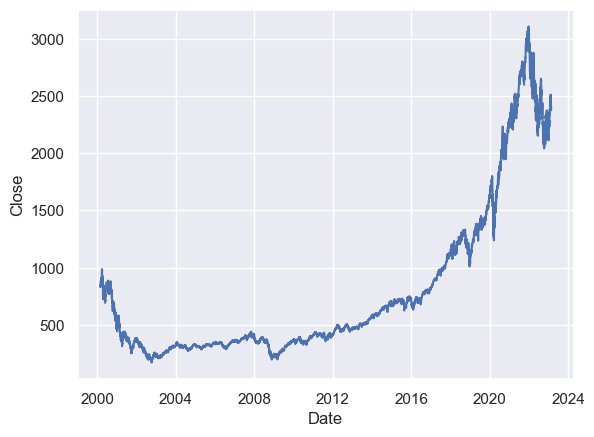

In [5]:
#Realizamos el gráfico
sns.lineplot(data=sp500_sector,y='Close',x=sp500_sector.index)

In [7]:
#Comparamos con el del SP500 completo
sp500 = pd.read_csv('sp500.csv',index_col=0)
sp500.index = pd.to_datetime(sp500.index)
sp500.head()

,Close,Volume
Date,,
2000-02-23,1360.689941,993700000
2000-02-24,1353.430054,1215000000
2000-02-25,1333.359985,1065200000
2000-02-28,1348.050049,1026500000
2000-02-29,1366.420044,1204300000


<Axes: xlabel='Date', ylabel='Close'>

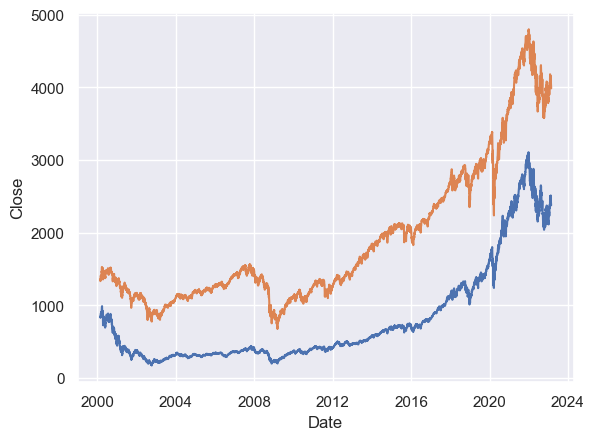

In [10]:
#Realizamos el gráfico
sns.lineplot(data=sp500_sector,y='Close',x=sp500_sector.index)
sns.lineplot(data=sp500,y='Close',x=sp500.index)

Text(0.5, 1.0, 'SP500')

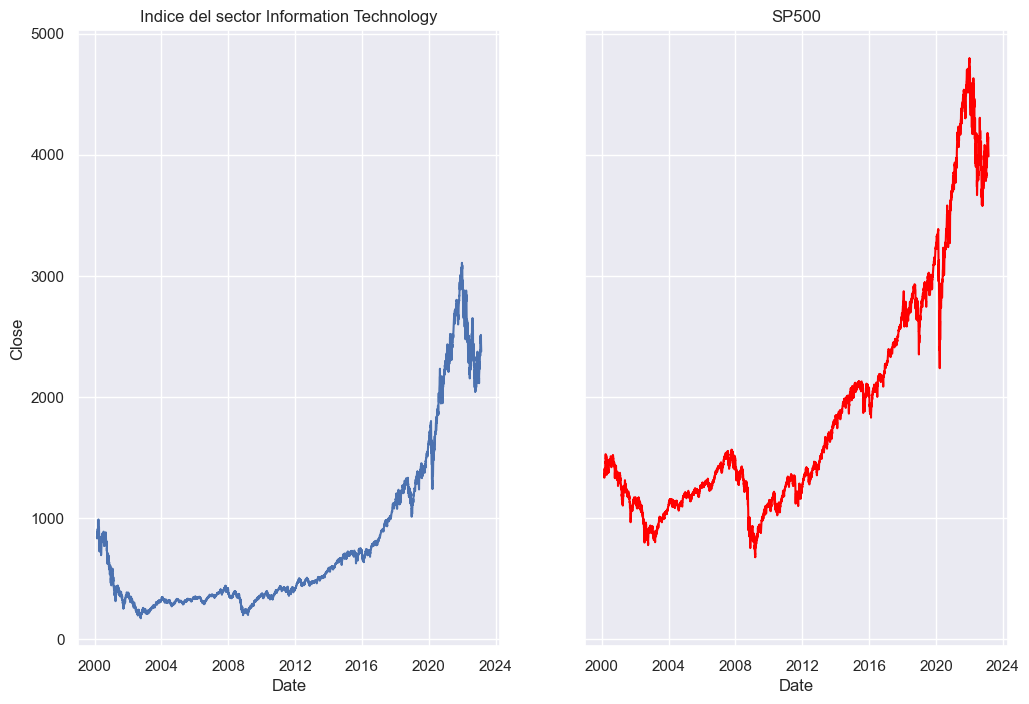

In [20]:
#Ponemos los 2 juntos
fig, ax = plt.subplots(1,2,sharey=True,figsize=(12,8))


sns.lineplot(data=sp500_sector,y='Close',x=sp500_sector.index,ax=ax[0])
ax[0].set_title('Indice del sector '+sector)

sns.lineplot(data=sp500,y='Close',x=sp500.index,ax=ax[1],color='red')
ax[1].set_title('SP500')